In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
lam1 = 1
lam2 = 0.1
h = 0.01
T = 15
n = int(T/h)
N = 10000
theta = 0.05
sigma = 0.05
x0 = 0.02

In [3]:
def simulate_X(theta, lam, sigma, h, x0, Z):
    N, n = Z.shape
    X = np.zeros((N,n+1))
    X[:,0] = x0
    for i in range(1,n+1):
        X[:,i] = theta + (X[:,i-1]-theta)*np.exp(-lam*h) + np.sqrt(sigma*sigma/2/lam*(1-np.exp(-2*lam*h)))*Z[:,i-1]
    
    return X

Z1 = np.random.randn(N,n)
Z2 = np.random.randn(N,n)
X1 = simulate_X(theta, lam1, sigma, h, x0, Z1)
X2 = simulate_X(theta, lam2, sigma, h, x0, Z2)
r = X1 + X2

In [4]:
P_simu = np.mean(np.exp(-h*np.cumsum(r[:,1:], axis = 1)),axis =0)
tt = h*np.arange(1,n+1)
yield_simu = - np.log(P_simu)/(tt)

The theoretical value of rho is 
$$ \rho_i = \theta_i + (x_i - \theta_i)\frac{1- e^{-\lambda_i T}}{\lambda_i T} - \frac{\sigma_i^2}{2T \lambda_i^2}\left(T + \frac{2}{\lambda_i}(e^{-\lambda_i T} - 1) - \frac{1}{2 \lambda_i}(e^{-2\lambda_iT}-1)\right)$$

In [5]:
def theoretical_yield_cureve(x01,x02,theta1,theta2,sigma1,sigma2,lam1,lam2,tt):
    rho1 = theta1 + (x01- theta1)*(1-np.exp(-lam1*tt))/lam1/tt 
    rho1 -= sigma1*sigma1/(2*tt*lam1*lam1)*(tt + 2/lam1*(np.exp(-lam1*tt)-1)-(np.exp(-2*lam1*tt)-1)/(2*lam1))
    rho2 = theta2 + (x02- theta2)*(1-np.exp(-lam2*tt))/lam2/tt 
    rho2 -= sigma2*sigma2/(2*tt*lam2*lam2)*(tt + 2/lam2*(np.exp(-lam2*tt)-1)-(np.exp(-2*lam2*tt)-1)/(2*lam2))
    yield_theo = rho1 + rho2
    return yield_theo

yield_theo = theoretical_yield_cureve(x0,x0,theta,theta,sigma,sigma,lam1,lam2,tt)

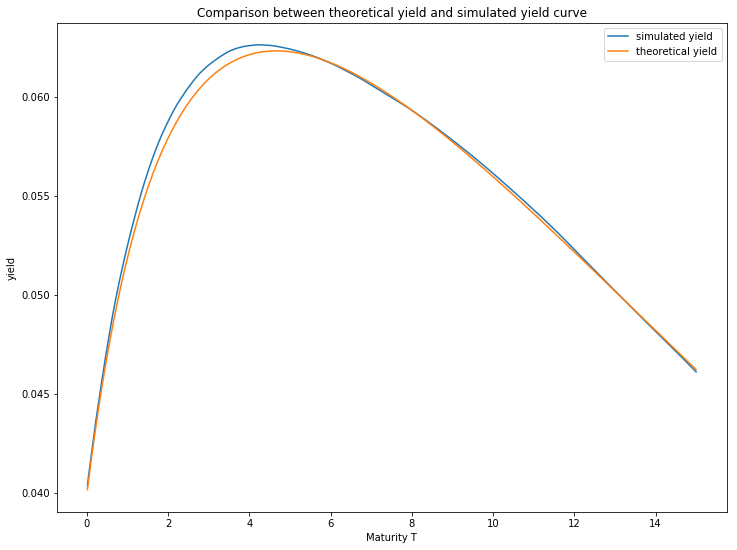

In [6]:
plt.figure(figsize=(12,9))
plt.plot(tt,yield_simu, label="simulated yield")
plt.plot(tt,yield_theo, label="theoretical yield")
plt.legend(loc = "best")
plt.title("Comparison between theoretical yield and simulated yield curve")
plt.xlabel("Maturity T")
plt.ylabel("yield")
plt.show()

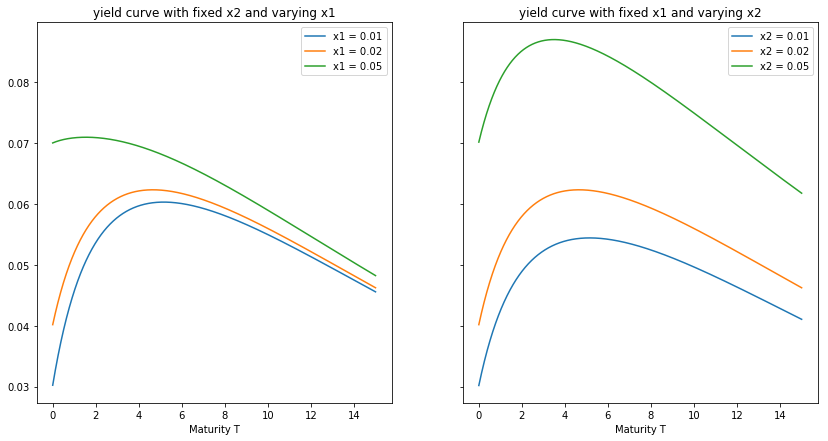

In [7]:
xx = [0.01, 0.02, 0.05]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))
for x in xx:
    curve = theoretical_yield_cureve(x,x0,theta,theta,sigma,sigma,lam1,lam2,tt)
    ax1.plot(tt, curve, label = "x1 = {}".format(x))
ax1.set_xlabel("Maturity T")
ax1.legend()
ax1.set_title('yield curve with fixed x2 and varying x1')

for x in xx:
    curve = theoretical_yield_cureve(x0,x,theta,theta,sigma,sigma,lam1,lam2,tt)
    ax2.plot(tt, curve, label = "x2 = {}".format(x))
ax2.set_xlabel("Maturity T")
ax2.legend()
ax2.set_title('yield curve with fixed x1 and varying x2')
plt.show()

## Observation
As we can see from two figures, the yield curves are higher if the initial point x1 or x2 are higher. The lambda of X1 is 1, and the lambda of X2 is 0.1. In the right figure, we fix x1 and vary the x2. Obviously, the differnces between curves with differnt initial x2 are more prominent. Thus, by comparing two above figures, we could conclude that smaller lambda could lead to a more prominent change in the yield curve if we only change the initial point x.

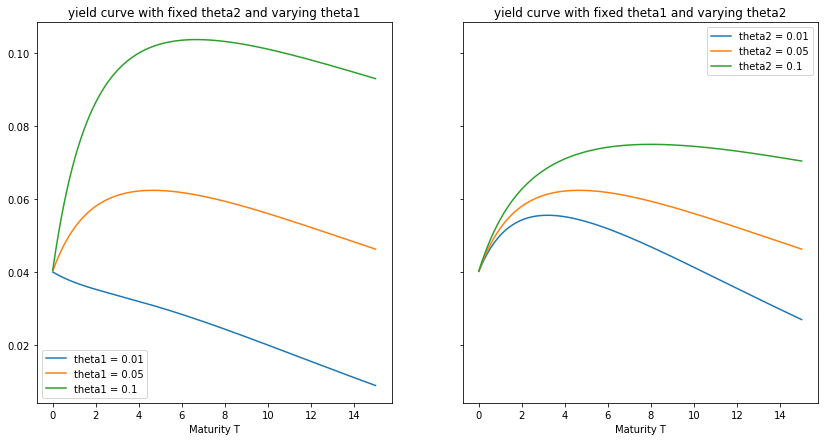

In [8]:
thetas = [0.01, 0.05, 0.1]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))
for t in thetas:
    curve = theoretical_yield_cureve(x0,x0,t,theta,sigma,sigma,lam1,lam2,tt)
    ax1.plot(tt, curve, label = "theta1 = {}".format(t))
ax1.set_xlabel("Maturity T")
ax1.legend()
ax1.set_title('yield curve with fixed theta2 and varying theta1')

for t in thetas:
    curve = theoretical_yield_cureve(x0,x0,theta,t,sigma,sigma,lam1,lam2,tt)
    ax2.plot(tt, curve, label = "theta2 = {}".format(t))
ax2.set_xlabel("Maturity T")
ax2.legend()
ax2.set_title('yield curve with fixed theta1 and varying theta2')
plt.show()

# Observation

In the expression of X_i, the theta representes the long term average level. Therefore, the yield curves are higher if the theta is bigger as we can see from the figures. The lambda of X1 is 1, and the lambda of X2 is 0.1. Obviously, the differnces between curves with differnt theta1 are more prominent. Thus, by comparing two above figures, we could conclude that bigger lambda could lead to a more prominent change in the yield curve if we fix all other parameters and change only theta.

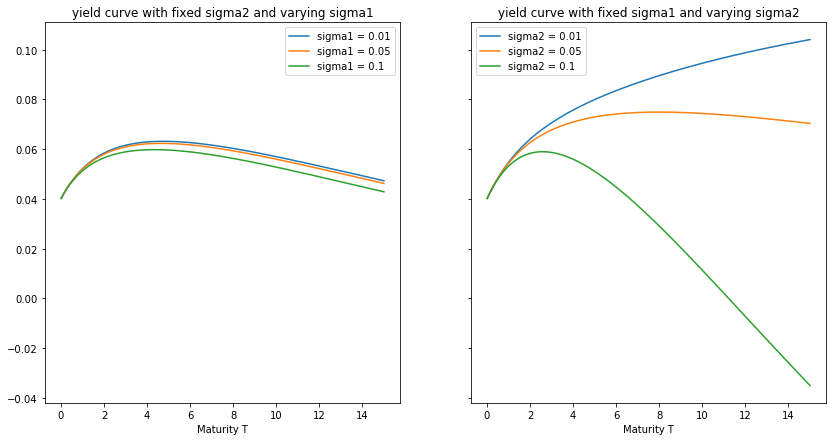

In [9]:
sigmas = [0.01, 0.05, 0.1]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))
for s in sigmas:
    curve = theoretical_yield_cureve(x0,x0,theta,theta,s,sigma,lam1,lam2,tt)
    ax1.plot(tt, curve, label = "sigma1 = {}".format(s))
ax1.set_xlabel("Maturity T")
ax1.legend()
ax1.set_title('yield curve with fixed sigma2 and varying sigma1')

for s in sigmas:
    curve = theoretical_yield_cureve(x0,x0,theta,t,sigma,s,lam1,lam2,tt)
    ax2.plot(tt, curve, label = "sigma2 = {}".format(s))
ax2.set_xlabel("Maturity T")
ax2.legend()
ax2.set_title('yield curve with fixed sigma1 and varying sigma2')
plt.show()

# Observation

In the expression of X_i, the sigma representes the volatility. Therefore, the yield curves are higher if the volatility is smaller as we can see from the figures. The lambda of X1 is 1, and the lambda of X2 is 0.1. Obviously, the differnces between curves with differnt sigma2 are more prominent. Thus, by comparing two above figures, we could conclude that smaller lambda could lead to a more prominent change in the yield curve if we fix all other parameters and change only sigma.